In [112]:
from sklearn.cluster import KMeans 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


In [54]:
numbers = np.load('data/processed/mnist_flattened.npy')

## Standardisation

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:

numbers.shape

(60000, 28, 28)

On applatit la donnée 

In [57]:
X_flat = numbers.reshape(numbers.shape[0], -1)


60k lignes, 784 features 

In [58]:
X_flat.shape

(60000, 784)

1/on calcule la moyenne de chaque pixel puis l'écart-type  
2/On applique la transformation suivante : X_std = (X_plat - moyenne) / écart-type 

In [59]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X_flat)

In [71]:
X_std.shape

(60000, 784)

In [72]:
X_std

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [102]:
from models.kmeans.Kmeans import KMeans

In [103]:

kmeans = KMeans(n_clusters=10, random_state=42, max_iter=3)
kmeans._fit(X_std)


In [104]:
labels = kmeans._predict(X_std)

distance la + petite du point à un centroide  
on renvoie le centroide le plus proche 

In [105]:
labels[:10]

array([2, 4, 0, 2, 3, 5, 3, 2, 3, 5])

on récupère de centroids, les coordonnées des centroides dans un espace à 784 dimensions

In [111]:
centroids = kmeans.centroids
centroids

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## reconstruction de l'image 

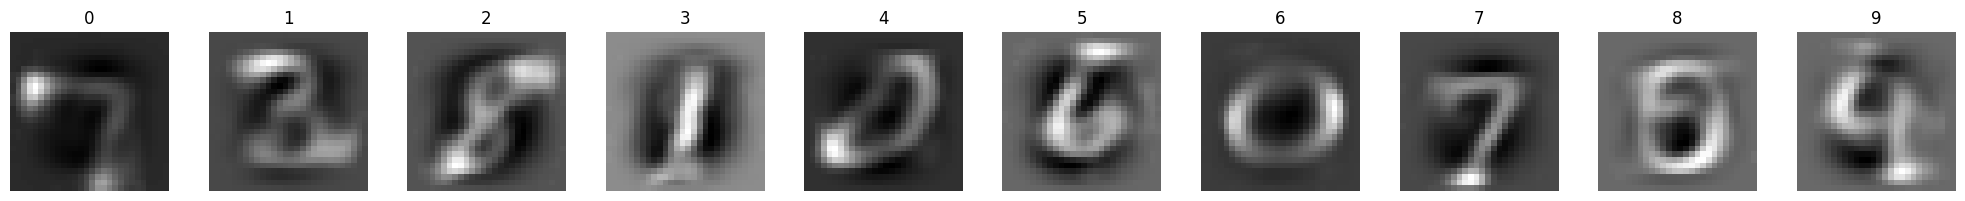

In [115]:
n = kmeans.n_clusters
fig, axes = plt.subplots(1, n, figsize=(2*n, 2))
for j, ax in enumerate(axes):
    img = kmeans.centroids[j].reshape(28, 28)
    ax.imshow(img, cmap="gray")
    ax.set_title(f"{j}")
    ax.axis("off")
plt.tight_layout()
plt.show()


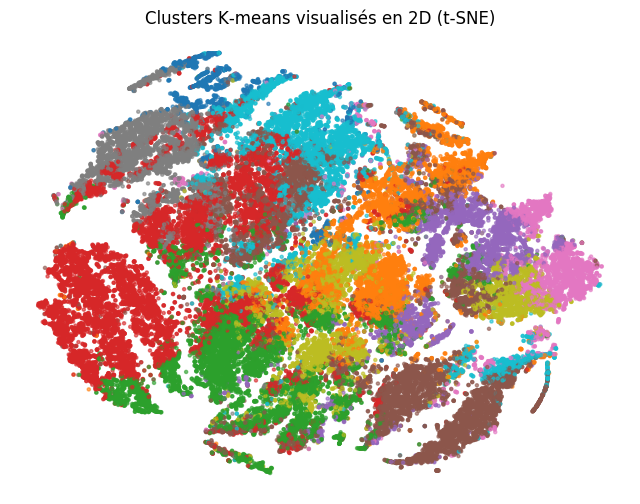

In [69]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# X_std : (60000, 784)  |  kmeans.labels_ : (60000,)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_2d = tsne.fit_transform(X_std)          # ralentit ~ 1‑2 min sur CPU

plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1],
            c=kmeans.labels_, cmap="tab10", s=5, alpha=0.6)
plt.title("Clusters K‑means visualisés en 2D (t‑SNE)")
plt.axis("off")
plt.show()


In [77]:
labels = kmeans.predict(X_std)

AttributeError: 'KMeans' object has no attribute 'predict'